# Computational experiment analysis

**Setup**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*Command line used:*

`locust -f locustfile.py -H http://localhost:5000/ -u 1000 -r 2 --headless --csv-full-history --csv run_1  -t 13m -s 300`

**Analysis for the global data (*i.e.*, considering the aggregated data for all API tasks)**

Opening:

In [3]:
df = pd.read_csv('run_1_stats_history.csv')

In [4]:
df

,Timestamp,User Count,Type,Name,Requests/s,Failures/s,50%,66%,75%,80%,...,99.9%,99.99%,100%,Total Request Count,Total Failure Count,Total Median Response Time,Total Average Response Time,Total Min Response Time,Total Max Response Time,Total Average Content Size
0,1709312905,0,NaN,Aggregated,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0.000000,0.000000,0.000000,0.000000,0.000000
1,1709312906,2,POST,//query,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,0,65.252292,65.324292,65.252292,65.396292,64.000000
2,1709312906,2,NaN,Aggregated,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2,0,65.252292,65.324292,65.252292,65.396292,64.000000
3,1709312907,4,POST,//query,0.0,0.0,6.0,6.0,8.0,8.0,...,8.0,8.0,8.0,5,0,8.000000,29.806242,4.350250,65.396292,63.400000
4,1709312907,4,NaN,Aggregated,0.0,0.0,6.0,6.0,8.0,8.0,...,8.0,8.0,8.0,5,0,8.000000,29.806242,4.350250,65.396292,63.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,1709313678,1000,NaN,Aggregated,336.3,0.0,3.0,4.0,5.0,7.0,...,110.0,140.0,140.0,174155,0,3.000000,7.717737,0.795291,183.967750,68.019506
1537,1709313679,1000,POST,//query,336.0,0.0,3.0,4.0,5.0,7.0,...,110.0,140.0,140.0,174508,0,3.000000,7.718103,0.795291,183.967750,68.018223
1538,1709313679,1000,NaN,Aggregated,336.0,0.0,3.0,4.0,5.0,7.0,...,110.0,140.0,140.0,174508,0,3.000000,7.718103,0.795291,183.967750,68.018223
1539,1709313680,1000,POST,//query,328.9,0.0,3.0,4.0,5.0,7.0,...,120.0,140.0,140.0,174867,0,3.000000,7.721405,0.795291,183.967750,68.017916


In [5]:
# problema específico porque o notebook desligou
# df = df[df['50%'] < 200]
# df = df[df['50%'] > 3]

Keeping only data for the steady state:

In [6]:
df = df.query('Name == "Aggregated"')

In [7]:
df.reset_index(inplace=True)

Inspection:

In [8]:
df.shape

(771, 25)

Visual inspectioning, for excluding excedent data:

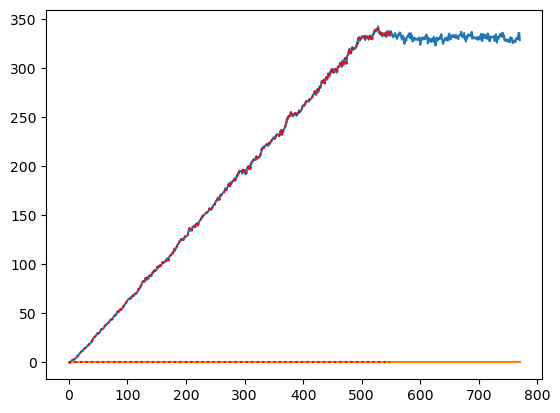

In [9]:
plt.plot(range(df.shape[0]), df['Requests/s'])
plt.plot(range(df.shape[0]), df['Failures/s'])

a, b = 0, 550

plt.plot(range(a,b), df['Requests/s'].iloc[a:b], c='red', ls='dotted')
plt.plot(range(a,b), df['Failures/s'].iloc[a:b], c='red', ls='dotted')

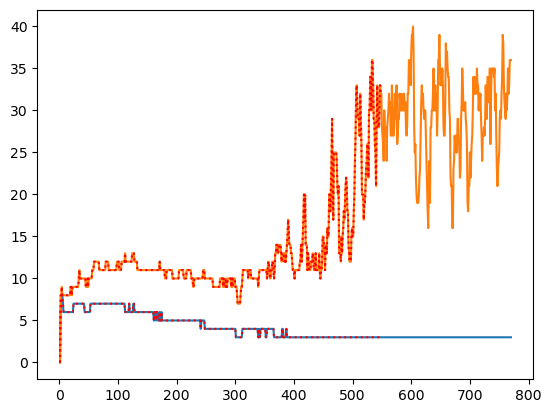

In [10]:
plt.plot(df['50%'])
plt.plot(df['90%'])

plt.plot(range(a,b), df['50%'].iloc[a:b], c='red', ls='dotted')
plt.plot(range(a,b), df['90%'].iloc[a:b], c='red', ls='dotted')

In [20]:
df = df.iloc[a:b]

Requests per second & Failures per second in response to Number of Users:

In [21]:
df.columns

Index(['index', 'Timestamp', 'User Count', 'Type', 'Name', 'Requests/s',
       'Failures/s', '50%', '66%', '75%', '80%', '90%', '95%', '98%', '99%',
       '99.9%', '99.99%', '100%', 'Total Request Count', 'Total Failure Count',
       'Total Median Response Time', 'Total Average Response Time',
       'Total Min Response Time', 'Total Max Response Time',
       'Total Average Content Size'],
      dtype='object')

RPS = 268.5


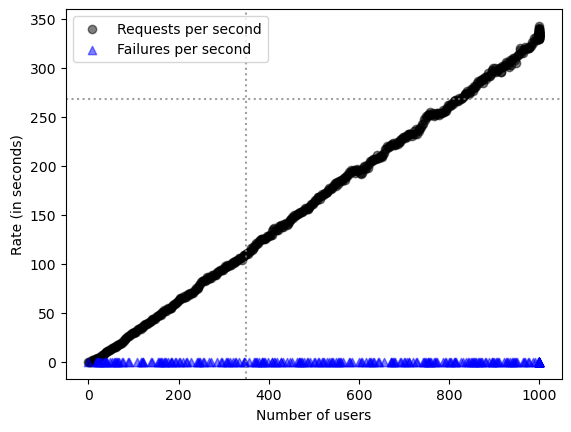

In [22]:
plt.scatter(df['User Count'], df['Requests/s'], 
            c='black', alpha=0.5, label='Requests per second')
plt.scatter(df['User Count'].sample(250), df['Failures/s'].sample(250), marker='^',
            c='blue', alpha=0.5, label='Failures per second')

rps = df['Requests/s'][int(df.shape[0]*0.5):].median()
print(f'RPS = {rps}')

plt.axvline(350, c='gray', ls='dotted', alpha=0.75)
plt.axhline(rps, c='gray', ls='dotted', alpha=0.75)
plt.xlabel('Number of users')
plt.ylabel('Rate (in seconds)')
plt.legend();

Visual inspection for the estimation of the threshold for user population size:

In [60]:
# visual inspection to help to estimate the threshold for user population size.
# plt.plot(df['90%'][:10000])
# conslusion: ~350

Response time in response to number of users:

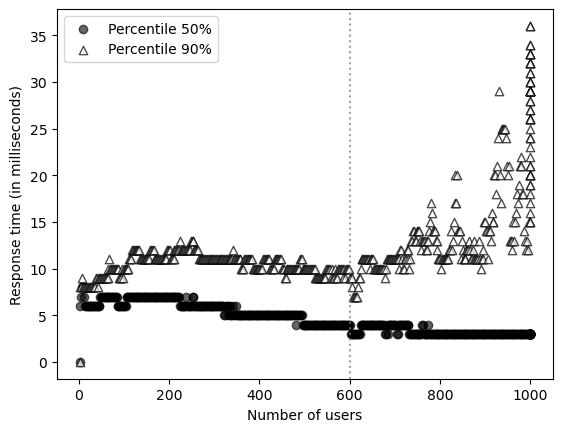

In [62]:
## TENTAR NÃO COLOCAR ESTA NO PAPER (TENTAR ENFOCAR NO RPS) ##

# plt.scatter(df['User Count'][:700], df['50%'][:700], c='black', alpha=0.5, label='Percentile 50%')
# plt.scatter(df['User Count'][:700], df['90%'][:700], marker='^', c='blue', alpha=0.5, label='Percentile 90%')

plt.scatter(df['User Count'], df['50%'], c='black', alpha=0.6, label='Percentile 50%')
plt.scatter(df['User Count'], df['90%'], marker='^', c='white', edgecolors='black', alpha=0.7, label='Percentile 90%')

# plt.ylim((0, 21000))

plt.axvline(600, c='gray', ls='dotted', alpha=0.75)
plt.xlabel('Number of users')
plt.ylabel('Response time (in milliseconds)')
plt.legend()

Response time as a function of requests per second (RPS):

*i) percentile 50th:*

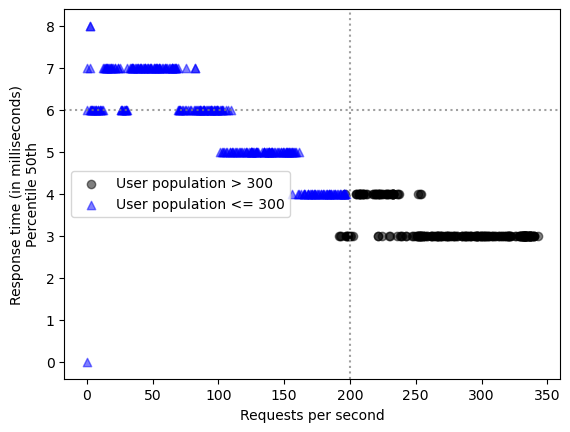

In [40]:
size_limit = 300

plt.scatter(df.iloc[size_limit:]['Requests/s'], df.iloc[size_limit:]['50%'], 
            c='black', alpha=0.5, label=f'User population > {size_limit}')
plt.scatter(df.iloc[:size_limit]['Requests/s'], df.iloc[:size_limit]['50%'], marker='^', 
            c='blue', alpha=0.5, label=f'User population <= {size_limit}')

# plt.ylim((0, 21000))

plt.axvline(200, c='gray', ls='dotted', alpha=0.75)
plt.axhline(df.iloc[:size_limit]['50%'].median(), c='gray', ls='dotted', alpha=0.75)

plt.xlabel('Requests per second')
plt.ylabel('Response time (in milliseconds)\nPercentile 50th')
plt.legend()

*ii) percentile 90th:*

In [65]:
df.iloc[size_limit]#['User Count']

index                                 600
Timestamp                      1709313206
User Count                            600
Type                                  NaN
Name                           Aggregated
Requests/s                          196.3
Failures/s                            0.0
50%                                   4.0
66%                                   5.0
75%                                   6.0
80%                                   7.0
90%                                   9.0
95%                                  13.0
98%                                  23.0
99%                                  33.0
99.9%                                80.0
99.99%                               82.0
100%                                 82.0
Total Request Count                 30382
Total Failure Count                     0
Total Median Response Time            5.0
Total Average Response Time      6.099389
Total Min Response Time          1.019333
Total Max Response Time        118

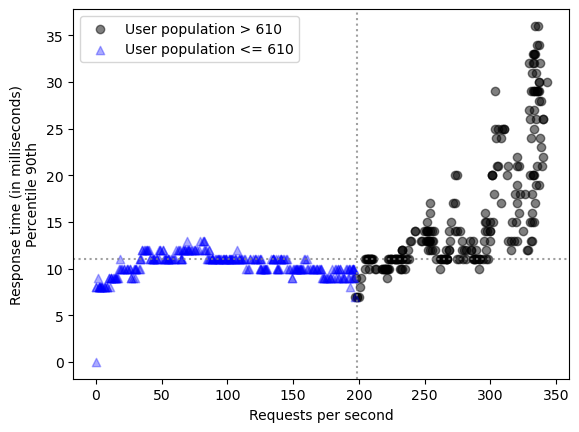

In [71]:
size_limit = 305

plt.scatter(df.iloc[size_limit:]['Requests/s'], df.iloc[size_limit:]['90%'], 
            c='black', alpha=0.5, label=f'User population > {df.iloc[size_limit]["User Count"]}')
plt.scatter(df.iloc[:size_limit]['Requests/s'], df.iloc[:size_limit]['90%'], marker='^', 
            c='blue', alpha=0.33, label=f'User population <= {df.iloc[size_limit]["User Count"]}')

# plt.ylim((0, 60000))

plt.axvline(df.iloc[size_limit]['Requests/s'], c='gray', ls='dotted', alpha=0.75)
plt.axhline(df.iloc[:size_limit]['90%'].median(), c='gray', ls='dotted', alpha=0.75)

plt.xlabel('Requests per second')
plt.ylabel('Response time (in milliseconds)\nPercentile 90th')
plt.legend()

Gráfico percentis 50th e 90th juntos:

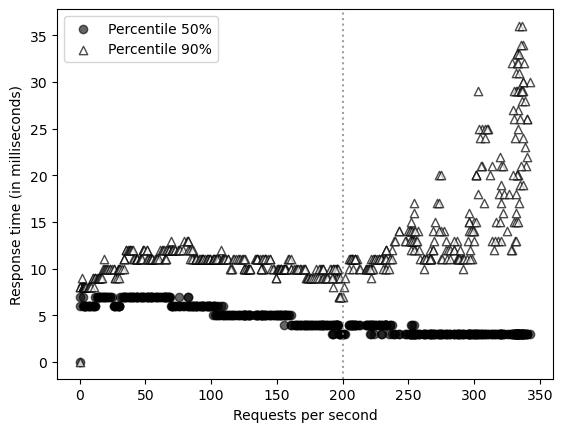

In [56]:
plt.scatter(df['Requests/s'], df['50%'], c='black', alpha=0.6, label='Percentile 50%')
plt.scatter(df['Requests/s'], df['90%'], marker='^', c='white', edgecolors='black', alpha=0.7, label='Percentile 90%')

# plt.ylim((0, 21000))

plt.axvline(200, c='gray', ls='dotted', alpha=0.75)
plt.xlabel('Requests per second')
plt.ylabel('Response time (in milliseconds)')
plt.legend()

Here, we also focused on the PC for obesity, in alignment with the previous section. But we used the HIAE institutional PC instead, which covers all the recommendations stated by the Brazilian National Health Ministry and adds more detailed evidence-based information and suggestions (e.g., medication prescription, referral to specialists, etc.). The HIAE-PC for obesity is publically available on the institutional website by the link https://medicalsuite.einstein.br/pratica-medica/SitePages/pathways.aspx.
